In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [2]:
!mkdir -p /root/.kaggle

In [3]:
import shutil

shutil.move("kaggle.json", "/root/.kaggle/")

'/root/.kaggle/kaggle.json'

In [4]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d muratkokludataset/grapevine-leaves-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/grapevine-leaves-image-dataset
License(s): CC0-1.0


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/grapevine-leaves-image-dataset.zip')
zip_ref.extractall()
zip_ref.close()

In [7]:
!ls Grapevine_Leaves_Image_Dataset

Ak  Ala_Idris  Buzgulu	Dimnit	Grapevine_Leaves_Image_Dataset_Citation_Request.txt  Nazli


In [8]:
import os

for dirpath, dirnames, filenames in os.walk('Grapevine_Leaves_Image_Dataset'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 5 directories and 1 images in Grapevine_Leaves_Image_Dataset.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Nazli.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Buzgulu.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Ak.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Ala_Idris.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Dimnit.


In [9]:
for i in os.walk('Grapevine_Leaves_Image_Dataset'):
  print(i)

('Grapevine_Leaves_Image_Dataset', ['Nazli', 'Buzgulu', 'Ak', 'Ala_Idris', 'Dimnit'], ['Grapevine_Leaves_Image_Dataset_Citation_Request.txt'])
('Grapevine_Leaves_Image_Dataset/Nazli', [], ['Nazli (83).png', 'Nazli (12).png', 'Nazli (52).png', 'Nazli (41).png', 'Nazli (74).png', 'Nazli (87).png', 'Nazli (51).png', 'Nazli (14).png', 'Nazli (42).png', 'Nazli (33).png', 'Nazli (36).png', 'Nazli (1).png', 'Nazli (68).png', 'Nazli (88).png', 'Nazli (93).png', 'Nazli (4).png', 'Nazli (65).png', 'Nazli (26).png', 'Nazli (15).png', 'Nazli (27).png', 'Nazli (78).png', 'Nazli (35).png', 'Nazli (73).png', 'Nazli (46).png', 'Nazli (100).png', 'Nazli (96).png', 'Nazli (38).png', 'Nazli (85).png', 'Nazli (10).png', 'Nazli (98).png', 'Nazli (90).png', 'Nazli (5).png', 'Nazli (11).png', 'Nazli (84).png', 'Nazli (43).png', 'Nazli (70).png', 'Nazli (91).png', 'Nazli (20).png', 'Nazli (55).png', 'Nazli (31).png', 'Nazli (29).png', 'Nazli (67).png', 'Nazli (24).png', 'Nazli (58).png', 'Nazli (34).png', 'Na

In [10]:
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir + target_class
  random_img = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (511, 511, 4)


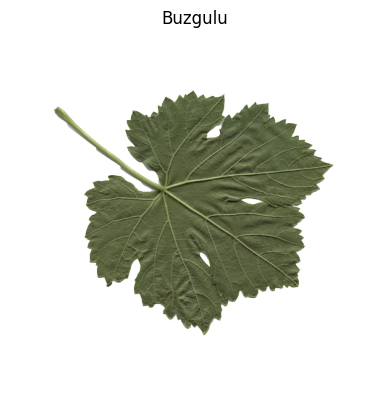

In [11]:
img = view_random_image(target_dir='/content/Grapevine_Leaves_Image_Dataset/',target_class='Buzgulu')

In [12]:
img/255

array([[[0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.003921

# Fit the model

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

dir = '/content/Grapevine_Leaves_Image_Dataset'

In [14]:
train_data = train_datagen.flow_from_directory(directory=dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training',
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical',
                                          shuffle=True,
                                          subset='validation',
                                          seed=42)

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [15]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [17]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.2265 - loss: 6.2070 - val_accuracy: 0.2400 - val_loss: 1.7325
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.3404 - loss: 2.2544 - val_accuracy: 0.1900 - val_loss: 1.6289
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.4343 - loss: 1.4358 - val_accuracy: 0.2300 - val_loss: 1.6652
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5963 - loss: 1.0147 - val_accuracy: 0.2300 - val_loss: 1.7677
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.6711 - loss: 0.8282 - val_accuracy: 0.2000 - val_loss: 2.2472


In [18]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         108,165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 383,185 (1.46 MB)

 Trainable params: 127,685 (498.77 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 255,372 (997.55 KB)

In [19]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [20]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.2122 - loss: 7.0992 - val_accuracy: 0.2000 - val_loss: 2.0968
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.3548 - loss: 1.5289 - val_accuracy: 0.2000 - val_loss: 1.6593
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5729 - loss: 1.0758 - val_accuracy: 0.2200 - val_loss: 1.6419
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.6993 - loss: 0.8111 - val_accuracy: 0.2600 - val_loss: 1.7380
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8465 - loss: 0.5381 - val_accuracy: 0.2400 - val_loss: 1.8397


In [21]:
len(train_data)

13

Image shape: (511, 511, 4)
Image shape: (511, 511, 4)
Image shape: (511, 511, 4)
Image shape: (511, 511, 4)
Image shape: (511, 511, 4)


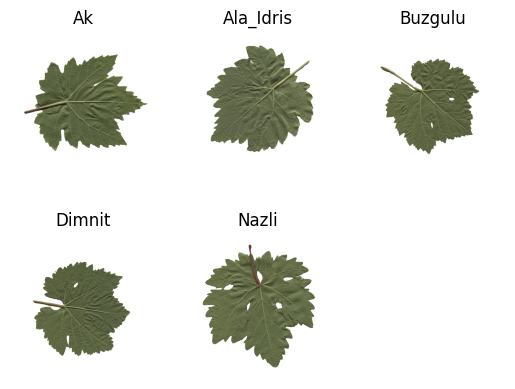

In [23]:
plt.figure()
plt.subplot(2,3,1)
view_random_image('Grapevine_Leaves_Image_Dataset/','Ak');
plt.subplot(2,3,2)
view_random_image('Grapevine_Leaves_Image_Dataset/','Ala_Idris');
plt.subplot(2,3,3)
view_random_image('Grapevine_Leaves_Image_Dataset/','Buzgulu');
plt.subplot(2,3,4)
view_random_image('Grapevine_Leaves_Image_Dataset/','Dimnit');
plt.subplot(2,3,5)
view_random_image('Grapevine_Leaves_Image_Dataset/','Nazli');

In [24]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs=range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

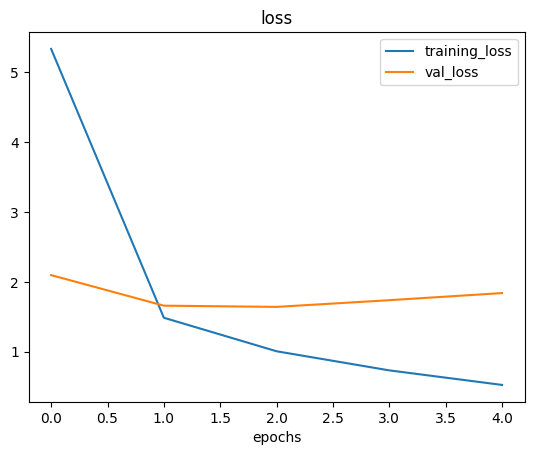

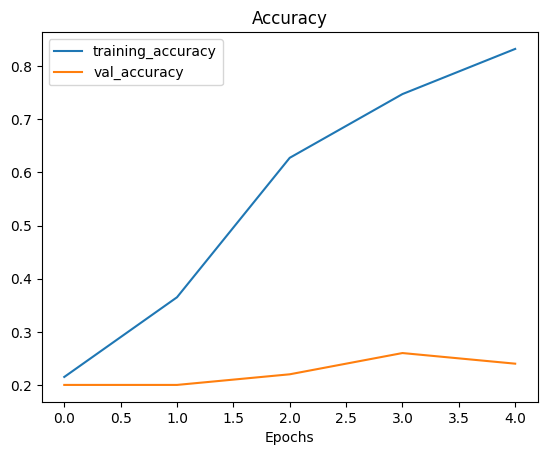

In [25]:
plot_loss_curves(history_2)

# Data Augmentation

In [26]:
# Augmented Dataset
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True,
                                             fill_mode='nearest',
                                             validation_split=0.2)
# Normal Dataset
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [27]:
print('Train data augmented: ')
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=dir,
                                                                   batch_size=32,
                                                                   target_size=(224,224),
                                                                   class_mode='categorical',
                                                                   subset='training',
                                                                   shuffle=True,
                                                                   seed=42)

print('Non-Augmented data: ')
train_data = train_datagen.flow_from_directory(directory=dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=42)

IMG_SIZE = (224,224)
test_data = test_datagen.flow_from_directory(directory=dir,
                                             batch_size=32,
                                             target_size=IMG_SIZE,
                                             subset='validation',
                                             class_mode='categorical',
                                             seed=42)

Train data augmented: 
Found 400 images belonging to 5 classes.
Non-Augmented data: 
Found 500 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [28]:
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

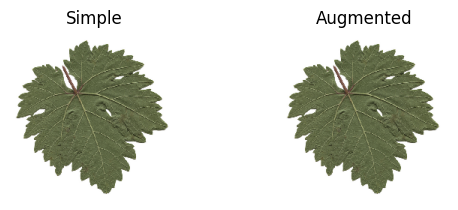

In [30]:
plt.figure()
random_number = np.random.randint(len(augmented_images))

plt.subplot(2,2,1)
plt.imshow(images[random_number])
plt.title('Simple')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(images[random_number])
plt.title('Augmented')
plt.axis('off')

In [31]:
from tensorflow.keras import regularizers

model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),
                           activation='relu',
                           input_shape=(224, 224, 3),
                           kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3, 3),
                           activation='relu',
                           kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=(3, 3),
                           activation='relu',
                           kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [32]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_3.compile(loss='categorical_crossentropy',
               optimizer=optimizer,
               metrics=['accuracy'])

In [33]:
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.1814 - loss: 16.8904 - val_accuracy: 0.2100 - val_loss: 8.9513
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.2335 - loss: 8.9183 - val_accuracy: 0.2000 - val_loss: 10.0284
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.2041 - loss: 8.5494 - val_accuracy: 0.2400 - val_loss: 17.3936
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.2273 - loss: 8.6316 - val_accuracy: 0.2000 - val_loss: 27.5909
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.1686 - loss: 8.4626 - val_accuracy: 0.2000 - val_loss: 36.8297


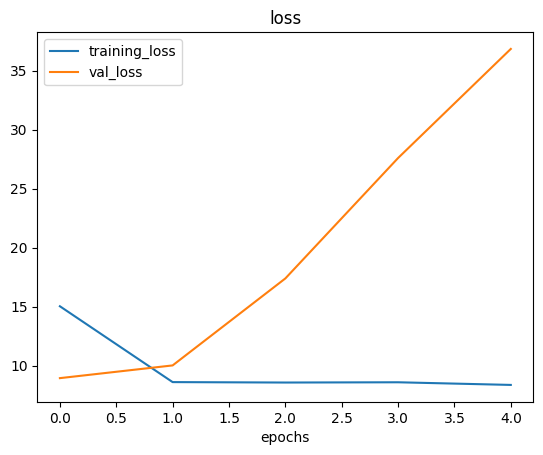

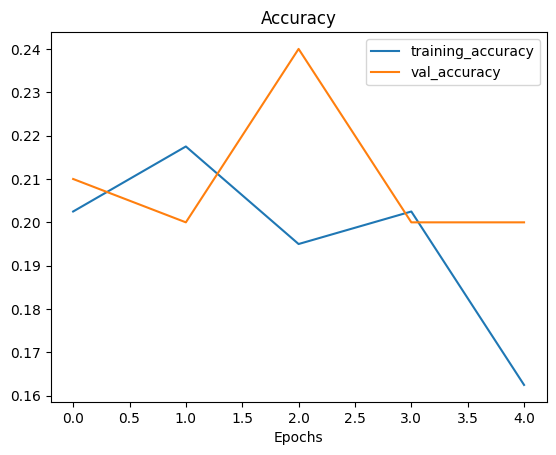

In [34]:
plot_loss_curves(history_3)

# CheckPoint and EarlyStopping

In [35]:
ckp = tf.keras.callbacks.ModelCheckpoint('MyCheckpoint.weights.h5',
                                          save_weights_only=True)

es = tf.keras.callbacks.EarlyStopping(restore_best_weights=True,
                                      patience=3,
                                      monitor='loss')

In [36]:
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[ckp,es])

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.1932 - loss: 8.0668 - val_accuracy: 0.2000 - val_loss: 41.4743
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.2028 - loss: 7.6993 - val_accuracy: 0.2000 - val_loss: 43.9790
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.2170 - loss: 7.4017 - val_accuracy: 0.2000 - val_loss: 41.0866
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.1805 - loss: 7.0493 - val_accuracy: 0.2000 - val_loss: 41.5774
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.2044 - loss: 6.7567 - val_accuracy: 0.2000 - val_loss: 43.6851


In [37]:
augmented_images.shape

(32, 224, 224, 3)

In [38]:
tf.expand_dims(augmented_labels,axis=0)

<tf.Tensor: shape=(1, 32, 5), dtype=float32, numpy=
array([[[0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1

In [39]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [40]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
model_4.compile(loss='categorical_crossentropy',
                            optimizer=optimizer,
                            metrics=['accuracy'])

In [41]:
history_4 = model_4.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.1888 - loss: 3.1176 - val_accuracy: 0.2000 - val_loss: 1.6484
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.2330 - loss: 2.5402 - val_accuracy: 0.2000 - val_loss: 1.6329
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.1997 - loss: 2.4070 - val_accuracy: 0.1900 - val_loss: 1.6313
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.2239 - loss: 2.1292 - val_accuracy: 0.1500 - val_loss: 1.6170
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.2389 - loss: 2.1294 - val_accuracy: 0.2200 - val_loss: 1.6140


In [42]:
model_4.evaluate(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - accuracy: 0.2130 - loss: 1.6177


[1.613998532295227, 0.2199999988079071]

# Transfer Learning

In [43]:
resnet_url = 'https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/2'
efficientrel_url = "https://tfhub.dev/google/efficientnet/b0/feature-vector/1"

In [44]:
import tensorflow_hub as hub

IMAGE_SHAPE = (224,224)
def create_model(model_url, num_classes=5):
  feature_extraction_layer = hub.KerasLayer(model_url,
                                            trainable=False,
                                            name='Feature_extraction_layer',
                                            input_shape = IMAGE_SHAPE + (3, ))
  model = tf.keras.Sequential([
      tf.keras.layers.Lambda(lambda x: feature_extraction_layer(x)),
      tf.keras.layers.Dense(num_classes, activation='softmax', name='output_layer')
  ])
  return model

In [45]:
resnet_model = create_model(resnet_url,num_classes=train_data.num_classes)

In [46]:
resnet_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
resnet_model.weights

[]

In [48]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=optimizer,
                     metrics=['accuracy'])

In [49]:
resnet_history = resnet_model.fit(train_data_augmented,
                                  batch_size=32,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=train_data,
                                  validation_steps=len(test_data))

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1865 - loss: 1.9157

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.1891 - loss: 1.9040 - val_accuracy: 0.4297 - val_loss: 1.4089
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 7s/step - accuracy: 0.3920 - loss: 1.4321 - val_accuracy: 0.6016 - val_loss: 1.1569
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.5291 - loss: 1.2582 - val_accuracy: 0.5625 - val_loss: 1.1038
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.5612 - loss: 1.1392 - val_accuracy: 0.6250 - val_loss: 0.9782
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.6228 - loss: 1.0351 - val_accuracy: 0.6797 - val_loss: 0.9202


In [50]:
resnet_model.evaluate(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.6358 - loss: 1.0029


[1.0308634042739868, 0.6000000238418579]

In [51]:
resnet_model.layers

[<Lambda name=lambda, built=True>, <Dense name=output_layer, built=True>]

In [52]:
resnet_model.layers[0]

<Lambda name=lambda, built=True>

In [53]:
def plot_loss_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('Epochs')
  plt.legend()

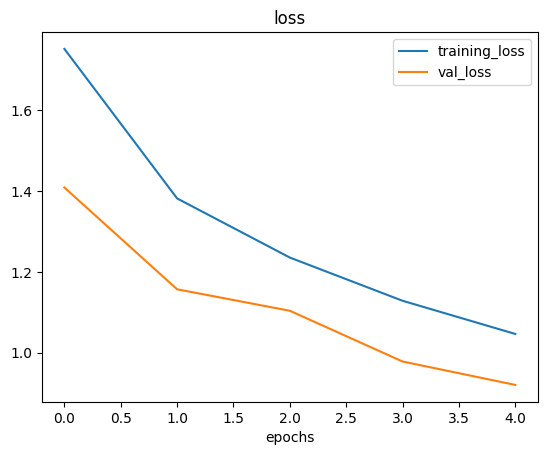

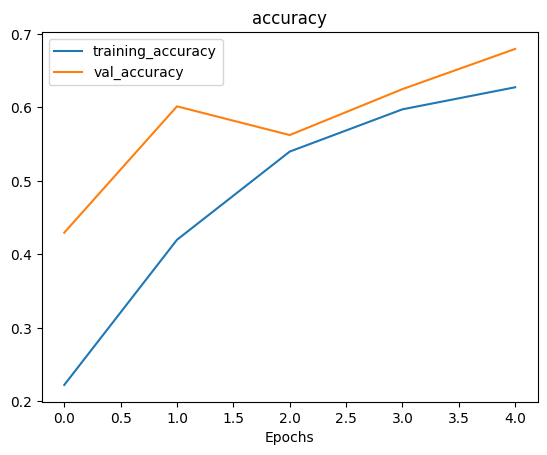

In [54]:
plot_loss_curve(resnet_history)

In [55]:
efficientrel_model = create_model(efficientrel_url, train_data.num_classes)

In [56]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
efficientrel_model.compile(loss='categorical_crossentropy',
                           optimizer=optimizer,
                           metrics=['accuracy'])

In [57]:
efficientrel_history = efficientrel_model.fit(train_data_augmented,
                                              epochs=5,
                                              steps_per_epoch=len(train_data_augmented),
                                              validation_data=test_data,
                                              validation_steps=len(test_data))

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.2798 - loss: 1.6141 - val_accuracy: 0.5300 - val_loss: 1.3404
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5295 - loss: 1.3426 - val_accuracy: 0.6700 - val_loss: 1.1848
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6063 - loss: 1.2027 - val_accuracy: 0.6400 - val_loss: 1.0759
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6366 - loss: 1.0913 - val_accuracy: 0.7200 - val_loss: 0.9951
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6542 - loss: 0.9874 - val_accuracy: 0.7600 - val_loss: 0.9261


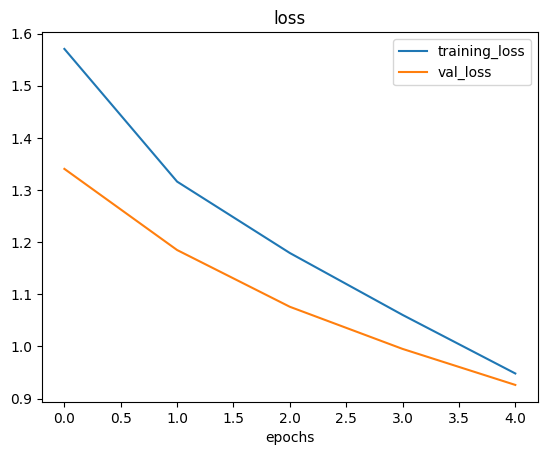

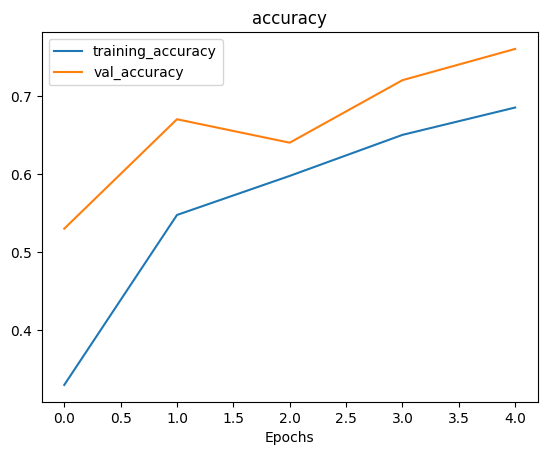

In [58]:
plot_loss_curve(efficientrel_history)

In [59]:
efficientrel_model.evaluate(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 830ms/step - accuracy: 0.7738 - loss: 0.8990


[0.9260737895965576, 0.7599999904632568]

In [60]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

--2025-04-09 15:02:27--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-04-09 15:02:28 (20.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [61]:
# Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False

inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

x = base_model(inputs)
print(f'Shape after base_model:{x.shape}')

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D: {x.shape}')

outputs = tf.keras.layers.Dense(5, activation='softmax', name='output_layer')(x)

model_0 = tf.keras.Model(inputs,outputs)

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape after base_model:(None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)


In [62]:
history_0 = model_0.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback('transfer_learning','grapevine_leaves_feature_extract')])

Saving TensorBoard log files to: transfer_learning/grapevine_leaves_feature_extract/20250409-150236
Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.2023 - loss: 1.6323 - val_accuracy: 0.1875 - val_loss: 1.6472
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.2085 - loss: 1.6358 - val_accuracy: 0.1250 - val_loss: 1.6404
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.2113 - loss: 1.6305 - val_accuracy: 0.2188 - val_loss: 1.6115
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.2198 - loss: 1.6187 - val_accuracy: 0.2812 - val_loss: 1.6064
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.1923 - loss: 1.6215 - val_accuracy: 0.1875 - val_loss: 1.6125


In [63]:
from tensorflow import keras
from tensorflow.keras import layers

In [64]:
data_augmentation = keras.Sequential([
    layers.Input(shape=(224,224,3)),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name='data_augmentation')

In [65]:
def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int=5,
                      learning_rate: float=1e-3,
                      training: bool = False) -> tf.keras.Model:
    tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False).trainable = training

    inputs = layers.Input(shape=input_shape, name='input_layer')
    x = data_augmentation(inputs)
    x = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False, input_shape=x.shape[1:])(x, training=False) # pass augmented images to base model but keep it in inference mode
    x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
    outputs = layers.Dense(units=output_shape, activation='softmax',name='output_layer')(x)
    model = tf.keras.Model(inputs, outputs)

    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])
    return model

model_2_with_base = create_base_model()

In [66]:
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoint.ckpt.weights.h5'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True,  # save only the best model weights
                                                         save_freq='epoch',   # save every epoch
                                                         verbose=1)

In [67]:
initial_epochs = 5

history_grapvine_leaves_data_aug = model_2_with_base.fit(train_data_augmented,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation steps
                                          callbacks=[checkpoint_callback])

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2840 - loss: 1.5644
Epoch 1: val_loss improved from inf to 1.63659, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt.weights.h5
13/13 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.2891 - loss: 1.5568 - val_accuracy: 0.1875 - val_loss: 1.6366
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5012 - loss: 1.2055
Epoch 2: val_loss did not improve from 1.63659
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.5027 - loss: 1.2029 - val_accuracy: 0.1562 - val_loss: 1.6799
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6499 - loss: 0.9854
Epoch 3: val_loss improved from 1.63659 to 1.62134, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt.weights.h5
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 7s/step - accuracy: 0.6465 - loss: 0.9916 - val_accuracy: 0.2812 - val_loss: 1.6213
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6667 - loss: 0.9435
Epoch 4: val_loss

In [68]:
images, labels = next(test_data)

results = model_2_with_base(images)
results

<tf.Tensor: shape=(32, 5), dtype=float32, numpy=
array([[0.32609236, 0.30974472, 0.11477942, 0.13847286, 0.11091055],
       [0.32557145, 0.31519002, 0.11256817, 0.13823709, 0.10843334],
       [0.32526937, 0.31210217, 0.11351693, 0.13917764, 0.10993382],
       [0.3251887 , 0.31067112, 0.11431826, 0.13911279, 0.11070929],
       [0.32490504, 0.3115933 , 0.11403184, 0.13940434, 0.1100654 ],
       [0.32566598, 0.3116362 , 0.11355597, 0.13911113, 0.11003079],
       [0.32532445, 0.31125912, 0.11395013, 0.13913235, 0.11033399],
       [0.32548928, 0.31246993, 0.11412445, 0.13786477, 0.11005162],
       [0.3263074 , 0.31040847, 0.1141436 , 0.13863163, 0.11050887],
       [0.32555306, 0.31168726, 0.11351996, 0.13924496, 0.10999484],
       [0.32512265, 0.3125178 , 0.11411624, 0.13862234, 0.10962095],
       [0.3249181 , 0.30977854, 0.11456518, 0.1397919 , 0.11094623],
       [0.3236367 , 0.31341502, 0.11388965, 0.13969077, 0.10936775],
       [0.32501647, 0.31102592, 0.11417136, 0.13936874

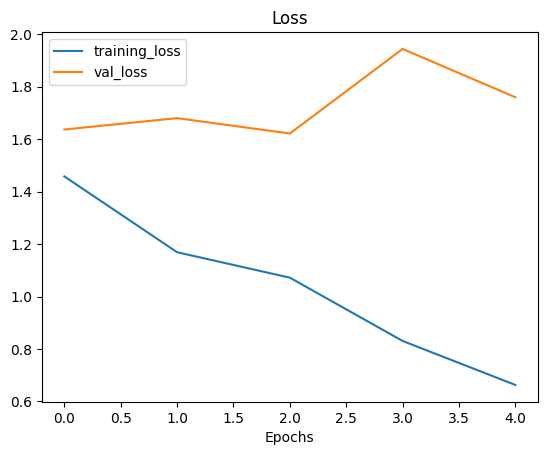

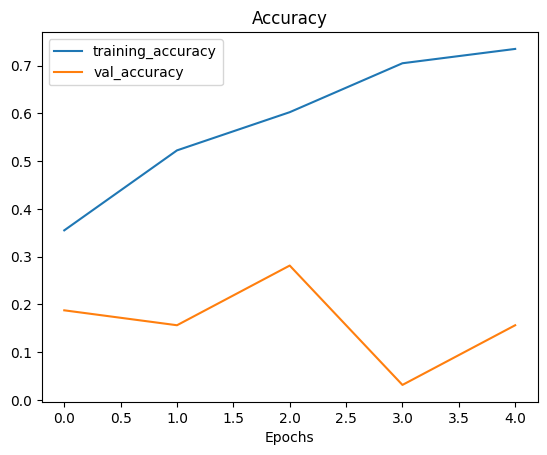

In [69]:
plot_loss_curves(history_grapvine_leaves_data_aug)

In [70]:
model_2_with_base.load_weights(checkpoint_path)
loadded_weights_model_result = model_2_with_base.evaluate(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 689ms/step - accuracy: 0.1790 - loss: 1.7226


In [71]:
results == loadded_weights_model_result

<tf.Tensor: shape=(), dtype=bool, numpy=False>

In [72]:
import numpy as np

loaded_weights_predictions = model_2_with_base.predict(images)
comparison_result = np.isclose(results, loaded_weights_predictions)
all_close = np.all(comparison_result)

print(f"Are all predictions close? {all_close}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Are all predictions close? False


# Fine-Tuning

In [73]:
model_2_with_base.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation, built=True>,
 <Functional name=efficientnetv2-b0, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling_layer, built=True>,
 <Dense name=output_layer, built=True>]

In [74]:
for layer_number, layer in enumerate(model_2_with_base.layers):
  print(f'Layer number: {layer_number} | Layer name: {layer.name} | Trainable? {layer.trainable}')

Layer number: 0 | Layer name: input_layer | Trainable? True
Layer number: 1 | Layer name: data_augmentation | Trainable? True
Layer number: 2 | Layer name: efficientnetv2-b0 | Trainable? True
Layer number: 3 | Layer name: global_average_pooling_layer | Trainable? True
Layer number: 4 | Layer name: output_layer | Trainable? True


In [75]:
model_2_with_base.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, None, None, 1280)    │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 5)                   │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,655,937 (67.35 MB)

 Trainable params: 5,865,109 (22.37 MB)

 Non-trainable params: 60,608 (236.75 KB)

 Optimizer params: 11,730,220 (44.75 MB)

In [76]:
model_2_base_model = model_2_with_base.layers[2]
model_2_base_model.name

'efficientnetv2-b0'

In [77]:
model_2_base_model.trainable = False

In [78]:
print(len(model_2_base_model.trainable_variables)) #layer at index 2 is the EfficientNetV2B0 layer

0


In [79]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 conv2d_3 True
1 batch_normalization_2 True
2 max_pooling2d_3 True
3 conv2d_4 True
4 batch_normalization_3 True
5 max_pooling2d_4 True
6 conv2d_5 True
7 max_pooling2d_5 True
8 flatten_1 True
9 dropout_1 True
10 dense_1 True


In [80]:
model_2_base_model.trainable = True

for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [81]:
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_9 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dw

In [82]:
print(len(model_2.trainable_variables))

12


In [83]:
fine_tune_epochs = initial_epochs + 5

history_fine_grapvine_leaves_data_aug = model_2.fit(train_data_augmented,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_grapvine_leaves_data_aug.epoch[-1],
                                               validation_steps=int(0.25 * len(test_data)))

Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.2532 - loss: 2.2229 - val_accuracy: 0.1250 - val_loss: 2.1851
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.3013 - loss: 1.7127 - val_accuracy: 0.2500 - val_loss: 1.8523
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.3568 - loss: 1.6121 - val_accuracy: 0.1562 - val_loss: 2.0520
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.3293 - loss: 1.5504 - val_accuracy: 0.3125 - val_loss: 2.2002
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.3648 - loss: 1.6019 - val_accuracy: 0.1250 - val_loss: 2.6512
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.3004 - loss: 1.5475 - val_accuracy: 0.1875 - val_loss: 2.8436


In [84]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.35499998927116394, 0.5224999785423279, 0.6025000214576721, 0.7049999833106995, 0.7350000143051147, 0.2874999940395355, 0.2874999940395355, 0.3474999964237213, 0.3149999976158142, 0.36250001192092896, 0.3100000023841858]


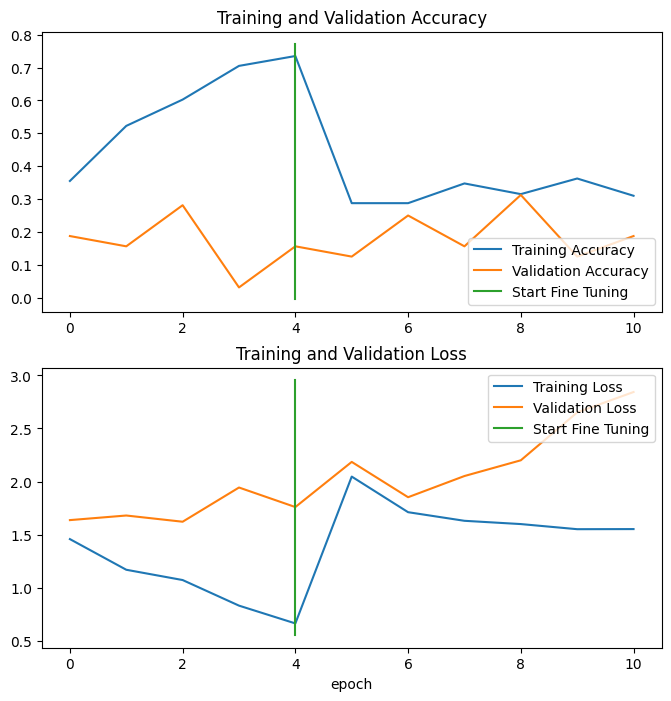

In [85]:
compare_historys(original_history=history_grapvine_leaves_data_aug,
                 new_history=history_fine_grapvine_leaves_data_aug,
                 initial_epochs=5);